## Libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from statistics import median, mode

import requests
from bs4 import BeautifulSoup

## Data source
https://www.kaggle.com/datasets/brainer3220/korean-real-estate-transaction-data

In [2]:
df = pd.read_csv('Apart Deal.csv')

/var/folders/xw/lb41tltj1cj78d3c_nsbh7c80000gn/T/ipykernel_897/3587319174.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Apart Deal.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348786 entries, 0 to 4348785
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    int64  
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int64  
 8   거래금액    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 298.6+ MB


In [4]:
df.columns = ['code', 'dong', 'time', 'apartment', 'lot', 'area', 'floor', 'year', 'amount']

In [5]:
for column in df.columns:
    print(column + ':', pd.api.types.infer_dtype(df[column]))

code: integer
dong: string
time: string
apartment: string
lot: string
area: floating
floor: mixed-integer
year: integer
amount: mixed-integer


In [6]:
# Assign all values that are not numeric as NaN
df['amount_num'] = pd.to_numeric(df['amount'], errors='coerce')

In [7]:
# Extract indexes of that values with commas as separator of thousands 
index = df.loc[df['amount_num'].isna(), 'amount'].str.contains(r'\d+,0{3}').index

In [8]:
df.loc[index, 'amount']

4313778    155,000
4313779    134,000
4313780    134,500
4313781    144,000
4313782    184,000
            ...   
4348781    110,000
4348782    124,000
4348783     25,600
4348784     18,000
4348785    149,000
Name: amount, Length: 35008, dtype: object

In [9]:
# Remove all commas
df.loc[index, 'amount'] = df.loc[index, 'amount'].str.replace(',', '')

In [10]:
df.loc[index, 'amount']

4313778    155000
4313779    134000
4313780    134500
4313781    144000
4313782    184000
            ...  
4348781    110000
4348782    124000
4348783     25600
4348784     18000
4348785    149000
Name: amount, Length: 35008, dtype: object

In [11]:
df['amount_num'] = pd.to_numeric(df['amount'], errors='coerce')

In [12]:
df['amount'] = df['amount'].astype('float')
df['amount_num'] = df['amount_num'].astype('float')

In [13]:
df['amount'].equals(df['amount_num'])

True

In [14]:
df.drop(columns = ['amount_num'], inplace=True)

In [15]:
df['floor'] = df['floor'].astype('str')
df['code'] = df['code'].astype('str')
df['time'] = df['time'].astype('datetime64[ns]')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348786 entries, 0 to 4348785
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   code       object        
 1   dong       object        
 2   time       datetime64[ns]
 3   apartment  object        
 4   lot        object        
 5   area       float64       
 6   floor      object        
 7   year       int64         
 8   amount     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 298.6+ MB


In [17]:
df.drop(columns=['dong', 'apartment', 'lot'], inplace=True)

In [18]:
# Detect administrative regions
df['city_area'] = df['code'].apply(lambda x: x[:2])

In [19]:
df['price'] = round(df['amount']/df['area'], 2)

In [20]:
df['year_deal'] = df['time'].dt.year

In [21]:
for i in df.columns:
    print(i, df[i].nunique())

code 249
time 2643
area 39874
floor 87
year 60
amount 26875
city_area 17
price 157959
year_deal 8


In [22]:
df['code'].unique()

array(['31110', '31140', '31170', '31200', '31710', '36110', '41111',
       '41113', '41115', '41117', '41131', '41133', '41135', '41150',
       '41171', '41173', '41190', '41210', '41220', '41250', '41271',
       '41273', '41281', '41285', '41287', '41290', '41310', '41360',
       '41370', '41390', '41410', '41430', '41450', '41461', '41463',
       '41465', '41480', '41500', '41550', '41570', '41590', '41610',
       '41630', '41650', '41670', '41800', '41820', '41830', '42110',
       '42130', '42150', '42170', '42190', '42210', '42230', '42720',
       '42730', '42750', '42760', '42770', '42780', '42790', '42800',
       '42810', '42820', '42830', '43111', '43112', '43113', '43114',
       '43130', '43150', '43720', '43730', '43740', '43745', '43750',
       '43760', '43770', '43800', '44131', '44133', '44150', '44180',
       '44200', '44210', '44230', '44250', '44270', '44710', '44760',
       '44770', '44790', '44800', '44810', '44825', '45111', '45113',
       '45130', '451

In [23]:
df['year'].unique()

array([1991, 2006, 2007, 1985, 1997, 1992, 2002, 1990, 2014, 2015, 2005,
       1993, 2017, 1983, 1989, 2018, 1979, 2016, 1978, 1996, 1995, 2004,
       1998, 2008, 2001, 2010, 1994, 1982, 2009, 2019, 1984, 2013, 1987,
       1980, 1986, 1999, 2003, 2000, 2012, 2020, 2011, 1988, 1981, 1977,
       1975, 1971, 1976, 1973, 1966, 1968, 1970, 1972, 1969, 1974, 1961,
       1967, 1962, 1965, 2021, 2022])

In [24]:
df['floor'].unique()

array(['8', '2', '11', '7', '5', '10', '9', '13', '22', '12', '4', '20',
       '15', '3', '6', '1', '14', '-1', '39', '19', '17', '23', '21',
       '18', '35', '34', '24', '29', '27', '16', '25', '31', '32', '28',
       '30', '50', '26', '33', '37', '36', '51', '48', '43', '38', '46',
       '45', '49', '42', '40', '44', '41', '61', '52', '60', '55', '54',
       '64', '56', '47', '58', '53', '57', '59', '62', '66', '63', '-2',
       '-3', '65', '68', '67', '69', '75', '74', '71', '73', '70', '72',
       '77', '76', '79', '80', '83', '81', ' ', '-4', '78'], dtype=object)

In [25]:
df[df['floor'] == ' '].count()

code         1
time         1
area         1
floor        1
year         1
amount       1
city_area    1
price        1
year_deal    1
dtype: int64

In [26]:
df = df[df['floor'] != ' ']

## EDA

### Numeric values

median - 3215200.0 won per m²


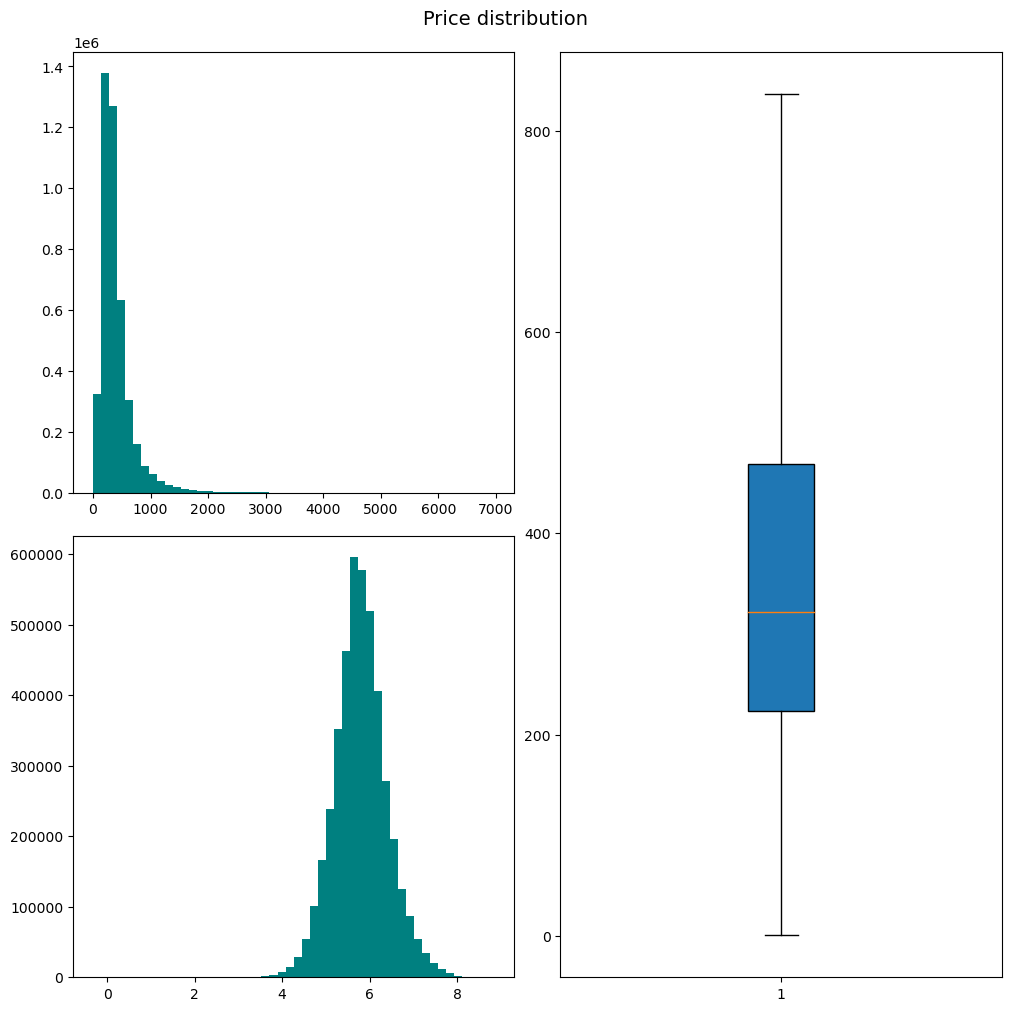

In [27]:
# Price research
median = np.quantile(df['price'], 0.5) * 10000
print(f'median - {median} won per m\u00b2')

fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 10), layout="constrained")

fig.suptitle('Price distribution', fontsize=14)
axd['upper left'].hist(df['price'], bins=50, color='teal')
axd['lower left'].hist(np.log(df['price']),bins=50, color='teal')
axd['right'].boxplot(df['price'], showfliers=False, patch_artist=True)

plt.show()

In [28]:
df['log_price'] = np.log(df['price'])

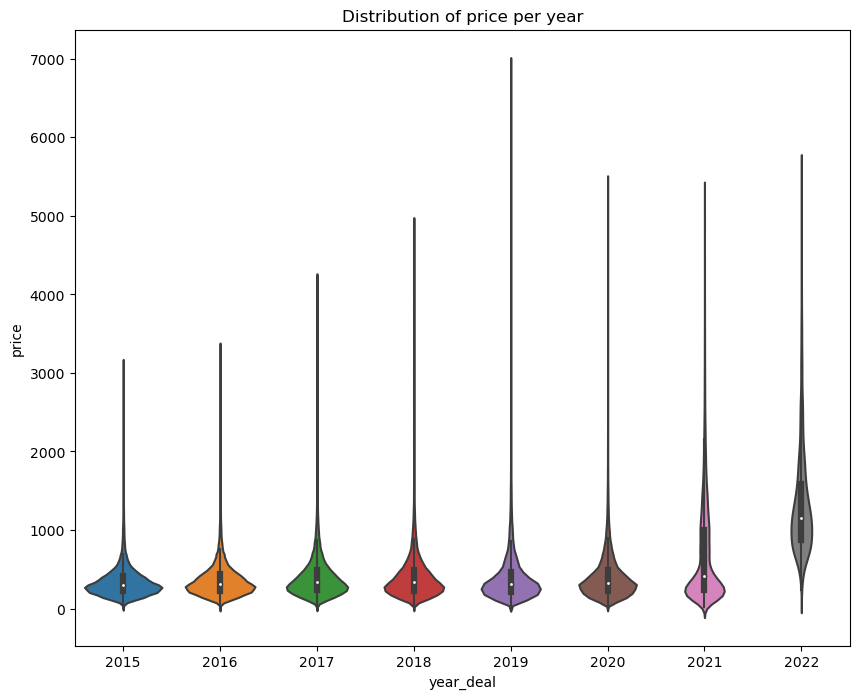

In [29]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='year_deal', y='price')
plt.title('Distribution of price per year')
plt.show()

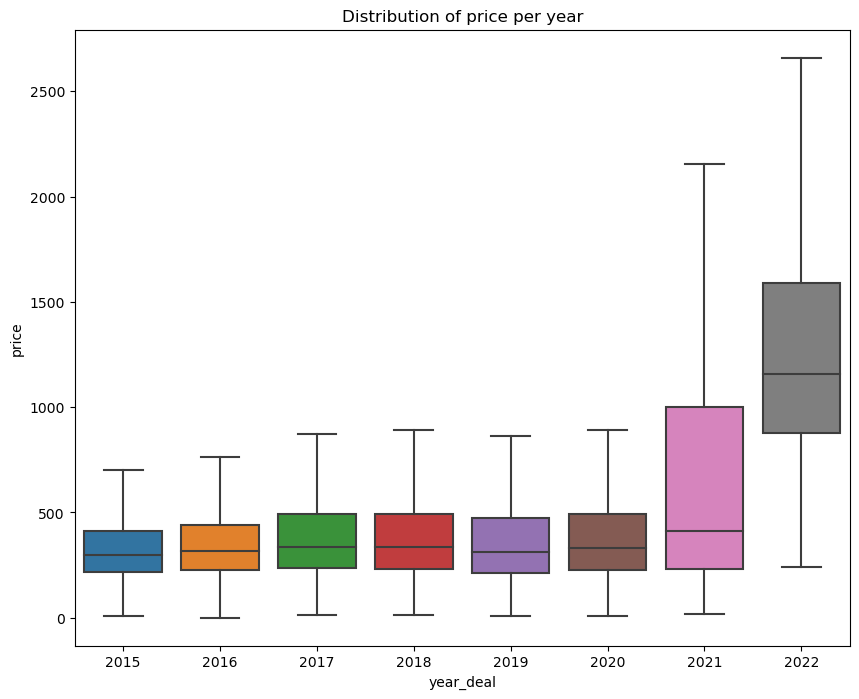

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='year_deal', y='price', showfliers=False)
plt.title('Distribution of price per year')
plt.show()

We would like to explore differences in means, for that we must check some conditions on the data before performing ANOVA:
 - the data within each group are nearly normal (it's true for transformed data)
 - the variability across the groups is about equal

In [31]:
grps = [df['log_price'].tolist() for group, data in df.groupby('year_deal')]

In [32]:
f_oneway(*grps)

F_onewayResult(statistic=2.1427374657980015e-26, pvalue=1.0)

Can't reject the hypothesis that all means are the same across groups.

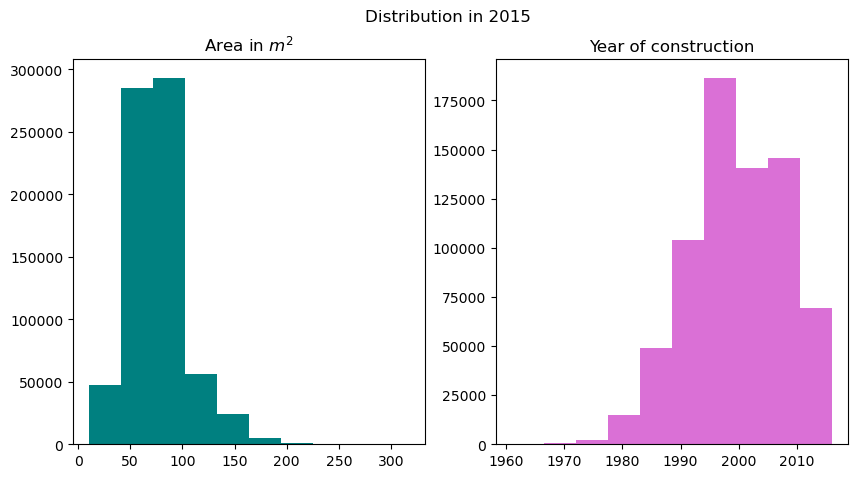

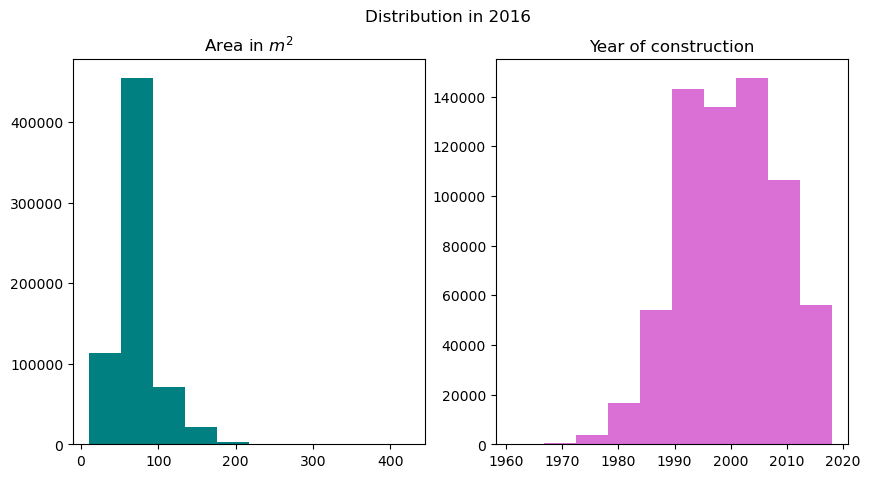

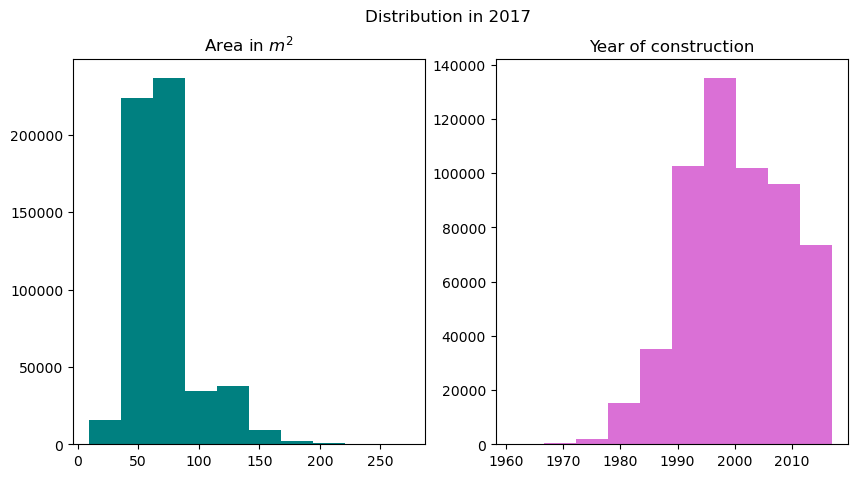

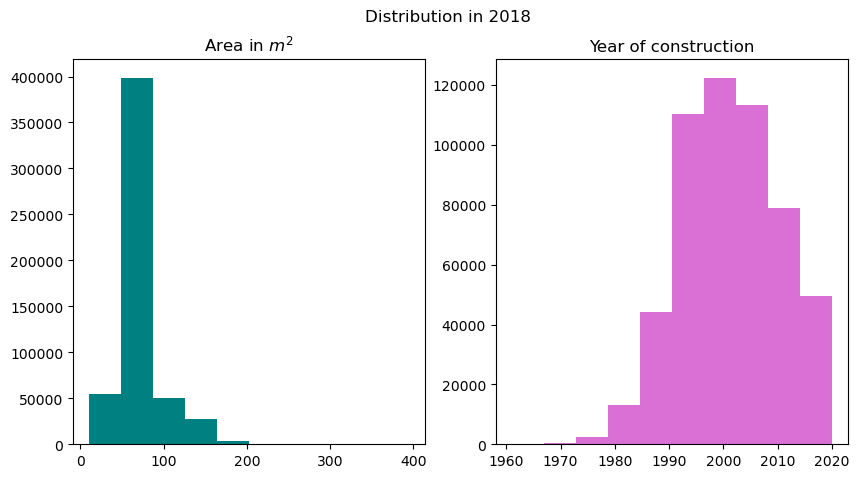

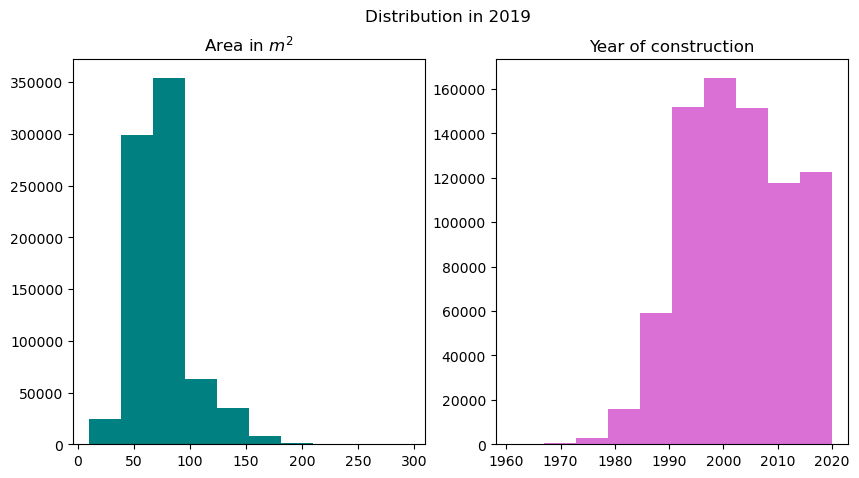

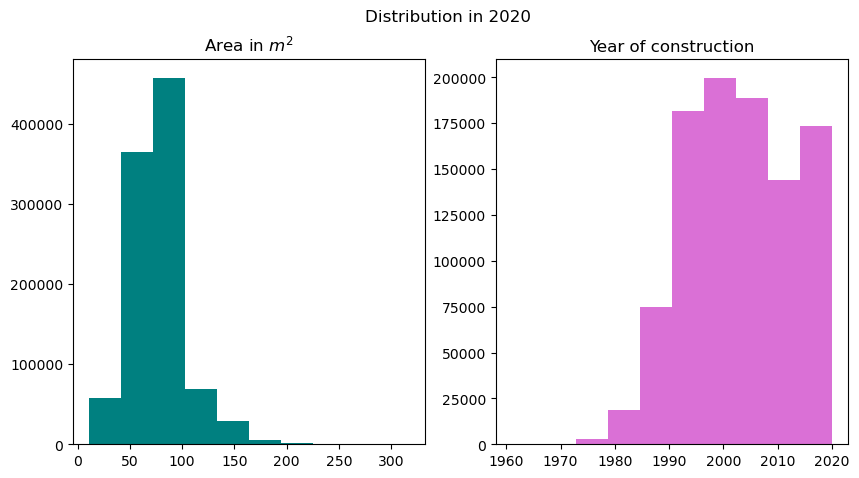

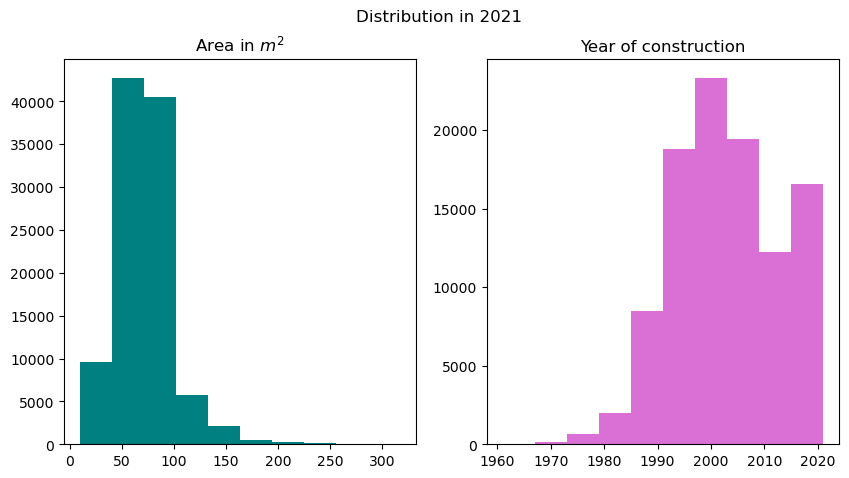

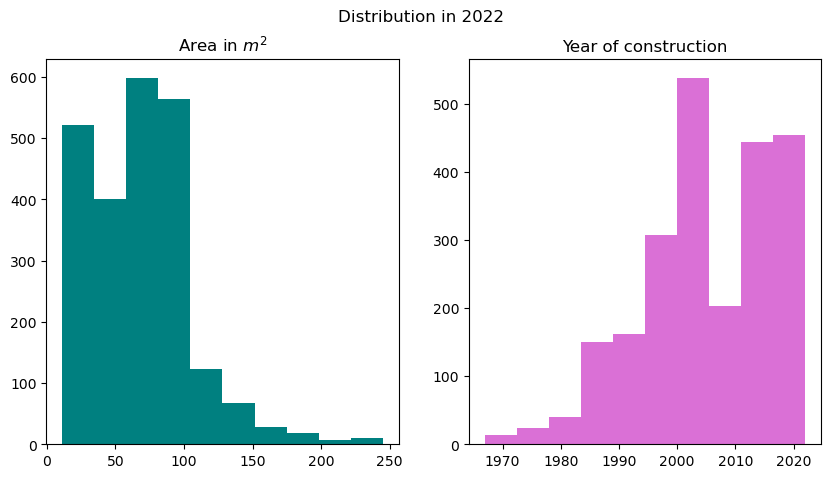

In [33]:
for year in range(df['year_deal'].min(), df['year_deal'].max() + 1):
    df_year = df[df['year_deal'] == year]
    fig, ax = plt.subplots(1,2, figsize=(10, 5))
    plt.suptitle(f'Distribution in {year}')
    ax[0].hist(df_year['area'], color='teal')
    ax[0].set_title('Area in $m^2$')
    ax[1].hist(df_year['year'], color='orchid')
    ax[1].set_title('Year of construction')
    plt.show()

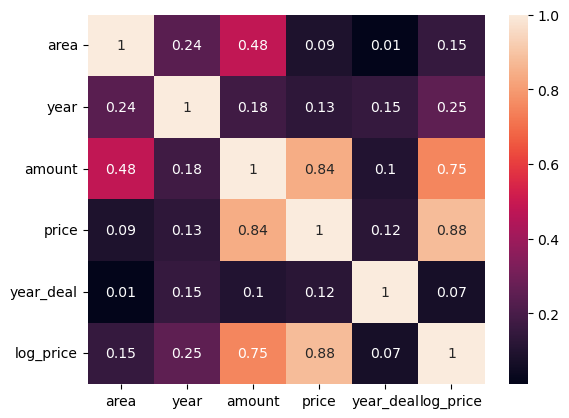

In [34]:
df_num = df.select_dtypes(include='number')
plt.figure()
corr = df_num.corr()
corr = np.round(corr, 2)
sns.heatmap(corr, annot=True)
plt.show()

### Categorical values

In [35]:
df.columns

Index(['code', 'time', 'area', 'floor', 'year', 'amount', 'city_area', 'price',
       'year_deal', 'log_price'],
      dtype='object')

In [36]:
def foo(x):
    return mode(x)
df.groupby('year_deal').agg({'year': foo,
                             'floor': foo, 
                             'code': foo,
                             'city_area': foo})

,year,floor,code,city_area
year_deal,,,,
2015,1997,4,41360,41
2016,1994,5,30170,41
2017,1997,5,11350,41
2018,1997,5,41590,41
2019,2017,5,41590,41
2020,2018,4,41590,41
2021,2004,5,11350,11
2022,2021,7,11530,11


In [37]:
# Scraping administrative regions from Wikipedia 
page = requests.get('https://en.wikipedia.org/wiki/Administrative_divisions_of_South_Korea')
soup = BeautifulSoup(page.text, 'html.parser')
indiatable = soup.find('table',{'class':"wikitable sortable"})
code = pd.read_html(str(indiatable))
code = pd.DataFrame(code[0])
code = code[['Code', 'Official English name[5]']]
code['Area_code'] = code['Code'].apply(lambda x: x.split('-')[1])

In [38]:
code.to_csv('code', index=False)

In [39]:
code.loc[code['Official English name[5]'].str.contains('Sejong'), 'Official English name[5]'] = 'Sejong'
code.loc[code['Official English name[5]'].str.contains('Jeju'), 'Official English name[5]'] = 'Jeju'
code.head()

,Code,Official English name[5],Area_code
0,KR-11,Seoul,11
1,KR-26,Busan,26
2,KR-27,Daegu,27
3,KR-28,Incheon,28
4,KR-29,Gwangju,29


In [40]:
# Upload geoinfo
geo = gpd.read_file('stanford-dk009rq9138-geojson.json')
geo.head()

,id,id_0,iso,name_0,id_1,name_1,hasc_1,ccn_1,cca_1,type_1,engtype_1,nl_name_1,varname_1,geometry
0,dk009rq9138.1,213,KOR,South Korea,1,Busan,KR.PU,0,None,Gwangyeoksi,Metropolitan City,부산광역시 | 釜山廣域市,Pusan|Busan Gwang'yeogsi|Pusan-gwangyoksi|Fusan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,dk009rq9138.2,213,KOR,South Korea,2,Chungcheongbuk-do,KR.GB,0,None,Do,Province,충청북도 | 忠淸北道,Chungchongbuk-Do|Chungcheongbugdo|Ch'ungch'ong...,"MULTIPOLYGON (((128.02734 37.15823, 128.03488 ..."
2,dk009rq9138.3,213,KOR,South Korea,3,Chungcheongnam-do,KR.GN,0,None,Do,Province,충청남도 | 忠淸南道,Chungchongnam-Do|Ch'ungch'ong-namdo|Chusei Nan...,"MULTIPOLYGON (((126.52458 36.03625, 126.52458 ..."
3,dk009rq9138.4,213,KOR,South Korea,4,Daegu,KR.TG,0,None,Gwangyeoksi,Metropolitan City,대구광역시 | 大邱廣域市,Taegu|Daegu Gwang'yeogsi|Taegu-gwangyoksi|Taikyu,"MULTIPOLYGON (((128.69171 35.96570, 128.69951 ..."
4,dk009rq9138.5,213,KOR,South Korea,5,Daejeon,KR.TJ,0,None,Gwangyeoksi,Metropolitan City,대구광역시 | 大邱廣域市,Daejeon Gwang'yeogsi|Taejŏn-gwangyŏksi|Taiden,"MULTIPOLYGON (((127.33807 36.45684, 127.35730 ..."


In [41]:
# Merge codes with geodata
partial_df = geo.merge(code, how='left', left_on='name_1', right_on='Official English name[5]')
partial_df = partial_df[['geometry', 'Official English name[5]', 'Area_code']]
partial_df.head()

,geometry,Official English name[5],Area_code
0,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",Busan,26
1,"MULTIPOLYGON (((128.02734 37.15823, 128.03488 ...",Chungcheongbuk-do,43
2,"MULTIPOLYGON (((126.52458 36.03625, 126.52458 ...",Chungcheongnam-do,44
3,"MULTIPOLYGON (((128.69171 35.96570, 128.69951 ...",Daegu,27
4,"MULTIPOLYGON (((127.33807 36.45684, 127.35730 ...",Daejeon,30


In [42]:
# Replace the code for administrative division code
df['city_area'] = ['47' if x == '36' else x for x in df['city_area']]

In [43]:
final_df = df.merge(partial_df, how='outer', left_on='city_area', right_on='Area_code')

In [44]:
final_df.loc[final_df['price'].isna(), 'price'] = 0
final_df.head()

,code,time,area,floor,year,amount,city_area,price,year_deal,log_price,geometry,Official English name[5],Area_code
0,31110,2020-05-30,135.5800,8,1991.0,26700.0,31,196.93,2020.0,5.282848,"MULTIPOLYGON (((129.35153 35.38708, 129.35153 ...",Ulsan,31
1,31110,2020-01-03,101.6000,2,2006.0,35500.0,31,349.41,2020.0,5.856246,"MULTIPOLYGON (((129.35153 35.38708, 129.35153 ...",Ulsan,31
2,31110,2020-01-03,84.9920,11,2007.0,36500.0,31,429.45,2020.0,6.062505,"MULTIPOLYGON (((129.35153 35.38708, 129.35153 ...",Ulsan,31
3,31110,2020-01-03,118.7060,8,2006.0,43000.0,31,362.24,2020.0,5.892307,"MULTIPOLYGON (((129.35153 35.38708, 129.35153 ...",Ulsan,31
4,31110,2020-01-04,84.9636,7,2007.0,38700.0,31,455.49,2020.0,6.121374,"MULTIPOLYGON (((129.35153 35.38708, 129.35153 ...",Ulsan,31


In [45]:
for_map = final_df.groupby('Official English name[5]').agg({'geometry': lambda x: x.mode(),
                                                            'price': lambda x: (x*10000).median()})

In [46]:
for_map.set_geometry('geometry')

,geometry,price
Official English name[5],,
Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",3314100.0
Chungcheongbuk-do,"MULTIPOLYGON (((128.02734 37.15823, 128.03488 ...",2042000.0
Chungcheongnam-do,"MULTIPOLYGON (((126.52458 36.03625, 126.52458 ...",2152900.0
Daegu,"MULTIPOLYGON (((128.69171 35.96570, 128.69951 ...",3242500.0
Daejeon,"MULTIPOLYGON (((127.33807 36.45684, 127.35730 ...",2768000.0
Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ...",1886600.0
Gwangju,"MULTIPOLYGON (((126.96989 35.19373, 126.97333 ...",2475600.0
Gyeonggi-do,"MULTIPOLYGON (((126.72764 37.01431, 126.72764 ...",3846200.0
Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ...",2077100.0


In [47]:
gdf = gpd.GeoDataFrame(for_map, geometry='geometry')

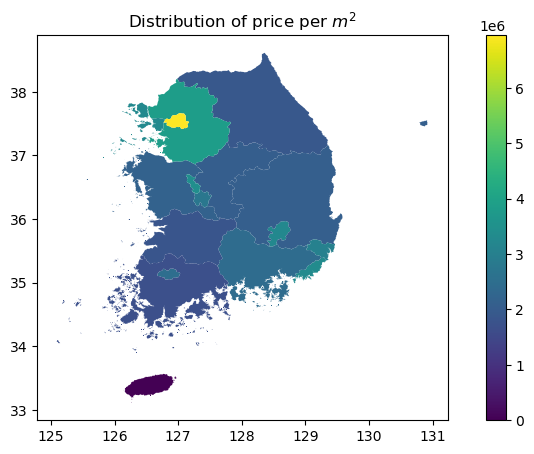

In [48]:
gdf.plot(column='price', legend=True, figsize=(10, 5))
plt.title('Distribution of price per $m^2$')
plt.show()